In [96]:
from typing import List, Dict, Any, Union, Iterator, LiteralString

import sympy
from sympy import AtomicExpr
from sympy import Ellipse, Point, Line, S, Eq, latex, plot_implicit
from sympy import symbols, simplify, Rational, solve
from IPython.display import Latex

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

In [97]:
ellipse = Ellipse(center=Point(1, 2), hradius=3, vradius=2)
props: Dict[str, Any] = {
    'eccentricity': ellipse.eccentricity,
    'area': ellipse.area,
    'circumference': ellipse.circumference,
    'center': ellipse.center,
    'hradius': ellipse.hradius,
    'vradius': ellipse.vradius,
    'periapsis': ellipse.periapsis,
    'apoapsis': ellipse.apoapsis,
    'focus\_distance': ellipse.focus_distance,
    'foci': ellipse.foci
}
display(Latex("$" + r'\\'.join((f'{key} = {latex(props[key])}') for key in props) + "$"))

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

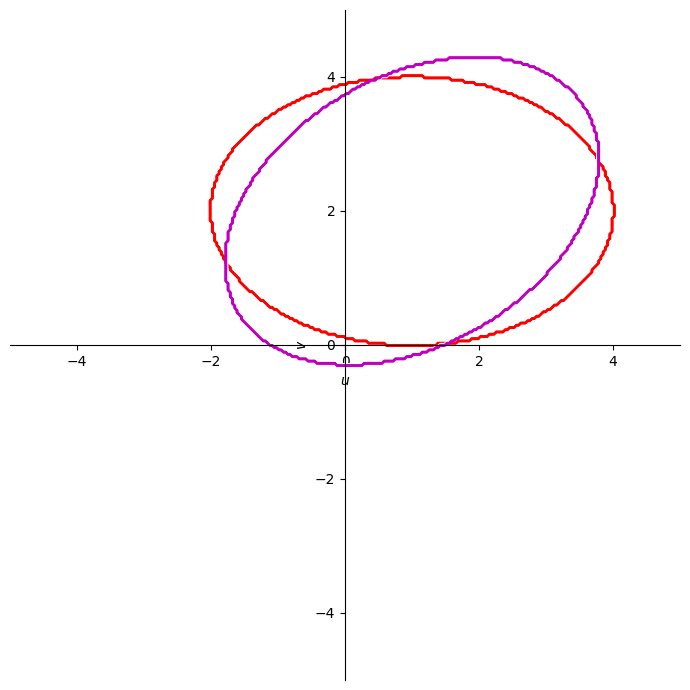

In [98]:
def degrees_to_rad(angle: Union[int, float, sympy.AtomicExpr]) -> sympy.AtomicExpr:
    return angle * sympy.pi / 180

eq = ellipse.equation(x='u', y='v')
tg_alpha = sympy.tan(degrees_to_rad(30))
eq_slope = ellipse.equation(x='u', y='v', _slope=tg_alpha)

p = plot_implicit(
    eq,
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
    size=(7, 7)
)
p.extend(plot_implicit(
    eq_slope,
    line_color='m',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False
))
p.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

Указание: вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы. 

In [99]:
eq1 = ellipse.equation()
symbs: Dict[str, AtomicExpr] = {str(s): s for s in eq1.free_symbols}
line: Line = Line(*ellipse.foci)
eq2 = line.equation()
roots1: List[Dict[AtomicExpr, AtomicExpr]] = solve((eq1, eq2), list(symbs.values()))

eq3 = line.perpendicular_line(ellipse.center).equation()
roots2: List[Dict[AtomicExpr, AtomicExpr]] = solve((eq1, eq3), list(symbs.values()))

roots1.extend(roots2)
points: List[Point] = [Point(x, y) for x, y in roots1]
display(*points)

Point2D(-2, 2)

Point2D(4, 2)

Point2D(1, 0)

Point2D(1, 4)

### Задание 4*.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

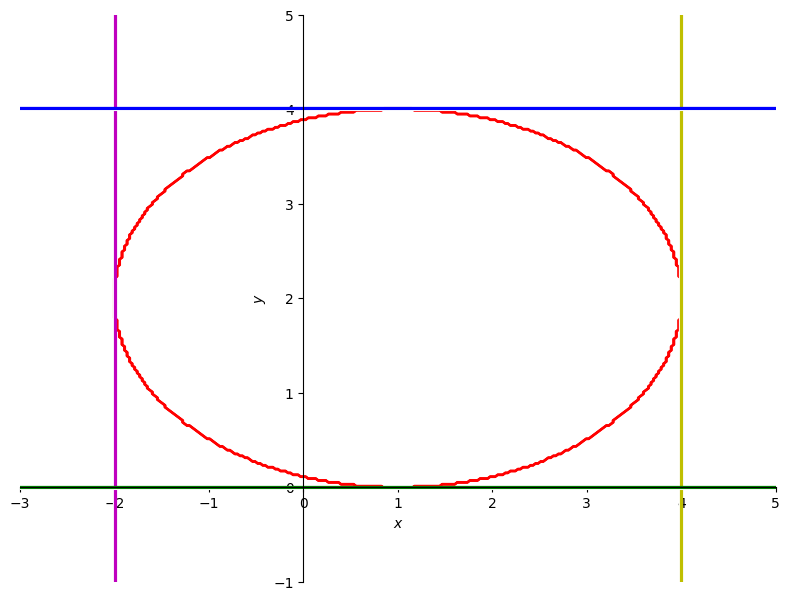

In [100]:
horiz_ellipse_axis: Line = Line(points[0], points[1])
vert_ellipse_axis: Line = Line(points[2], points[3])

iterator: Iterator[LiteralString] = iter(('m', 'y', 'g', 'b'))
eq = ellipse.equation(x='x', y='y')
p = plot_implicit(
    eq,
    (symbs['x'], -3, 5),
    (symbs['y'], -1, 5),
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
    size=(8, 8)
)
for point in points[:2]:
    p.extend(plot_implicit(
        vert_ellipse_axis.parallel_line(point).equation(),
        (symbs['x'], -3, 5),
        (symbs['y'], -1, 5),
        line_color=next(iterator),
        aspect_ratio=(1, 1),
        show=False,
        adaptive=False,
    ))
for point in points[2:]:
    p.extend(plot_implicit(
        horiz_ellipse_axis.parallel_line(point).equation(),
        (symbs['x'], -3, 5),
        (symbs['y'], -1, 5),
        line_color=next(iterator),
        aspect_ratio=(1, 1),
        show=False,
        adaptive=False,
    ))

p.show()

### Задание 5**.
Провести касательные к повернутому эллипсу из Задания 2 через его вершины.

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки. 

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.